## Diving Deeper into Pandas

In [21]:
##work with mouseData.txt

##filtering
##summarizing
##plotting (boxplot)

## A more complicated example

Yesterday you learned a little bit about loading data into Pandas. We're going to do much more manipulation and visualization with Pandas using data taken from Imaris. Imaris is image analysis software with many sophisticated functions. Below is a confocal image taken of inner hair cells stained with antibodies against CtBP2 (a pre-synaptic ribbon marker), GluR2 (a post-synaptic receptor) and MyosinVIIA (which labells the entire hair cell). There are three color channels (red, green, and blue) which indicate the intensity of the staining for CtBP2, GluR2 and MyosinVIIa, respectively.

(insert Brad's image here)

We used Imaris to detect all the "spots" in the CtBP2 (red) channel and compute some statistics about these spots. We've extracted the statistics file from the imaris file just to make things easier. Just know that there are routines to extract this information from the file.

In [22]:
import pandas as pd

point_stats = pd.read_csv("data/points_statistics.csv")

Because this data file was automatically generated by Imaris, we first need to figure out how it is organized.

We can start taking a look at the first few rows of our summary table using `point_stats.head()`:

In [23]:
##Show first few rows
point_stats.head()

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
0,-1,-1,22,267.000000,1,0,Total Number of Spots,NaN
1,0,0,60,3.938756,0,0,Area,um^2
2,0,1,60,3.137991,0,0,Area,um^2
3,0,2,60,3.817468,0,0,Area,um^2
4,0,3,60,3.125721,0,0,Area,um^2


What are some things we notice? Well, there appear to be some data that describe the entire sample (such as "Total Number of Spots") as well as data for localized points identified by Imaris in the red channel (such as "Area").  

Luci comments: I took out the word global to describe data for the entire sample as it has a specific meaning in programming that doesn't necessarily apply here

In [24]:
##show last few rows
point_stats.tail()

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
9609,0,262,61,0.399650,0,0,Volume,um^3
9610,0,263,61,0.274115,0,0,Volume,um^3
9611,0,264,61,0.421102,0,0,Volume,um^3
9612,0,265,61,0.288417,0,0,Volume,um^3
9613,0,266,61,0.230416,0,0,Volume,um^3


In [25]:
##show dimensions of data frame
point_stats.shape

(9614, 8)

We can also see that attributes for the various traits describing a given spot (such as "Area" and "Volume") are not columns, but rather listed under the categorical column "Name." If we are curious to see this full list of names, use the unique() function: 

In [26]:
point_stats.Name.unique()

array(['Total Number of Spots', 'Area', 'Diameter X', 'Diameter Y',
       'Diameter Z', 'Distance from Origin', 'Distance to Image Border XY',
       'Distance to Image Border XYZ', 'Generation', 'Intensity Center X',
       'Intensity Center Y', 'Intensity Center Z', 'Intensity Max X',
       'Intensity Max Y', 'Intensity Max Z', 'Intensity Mean X',
       'Intensity Mean Y', 'Intensity Mean Z', 'Intensity Median X',
       'Intensity Median Y', 'Intensity Median Z', 'Intensity Min X',
       'Intensity Min Y', 'Intensity Min Z', 'Intensity StdDev X',
       'Intensity StdDev Y', 'Intensity StdDev Z', 'Intensity Sum X',
       'Intensity Sum Y', 'Intensity Sum Z',
       'Number of Spots per Time Point', 'Number of Voxels', 'Position X',
       'Position Y', 'Position Z', 'Time', 'Time Index', 'Volume'], dtype=object)

If we want to take the data as is and run some simple descriptive statistics for each column:

In [27]:
point_stats.describe()

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList
count,9614.000000,9614.000000,9614.000000,9.614000e+03,9614.000000,9614.000000
mean,-0.000104,132.972124,96.904618,2.544252e+05,0.000208,2.971604
std,0.010199,77.095938,70.912544,9.488890e+05,0.014422,2.020885
min,-1.000000,-1.000000,22.000000,-1.253068e+00,0.000000,0.000000
25%,0.000000,66.000000,54.250000,6.547221e+00,0.000000,1.000000
50%,0.000000,133.000000,67.000000,1.153930e+03,0.000000,3.000000
75%,0.000000,200.000000,76.000000,5.479047e+03,0.000000,5.000000
max,0.000000,266.000000,243.000000,1.060018e+07,1.000000,6.000000


Notice that Python only computes statistics for variables with numerical values.

ID_Object of -1 designates statistics that describe the entire sample. What if we want to look only at data with ID_Object of -1:

In [28]:
point_stats[point_stats["ID_Object"]==-1]

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
0,-1,-1,22,267.0,1,0,Total Number of Spots,NaN
7744,0,-1,56,267.0,1,0,Number of Spots per Time Point,NaN


Let's look at all of the statistics that were collected for a single spot identified by Imaris.

In [29]:
point_stats[point_stats["ID_Object"]==1]

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
2,0,1,60,3.137991e+00,0,0,Area,um^2
269,0,1,237,6.374127e-01,0,1,Diameter X,um
536,0,1,238,6.374127e-01,0,1,Diameter Y,um
803,0,1,239,1.912238e+00,0,1,Diameter Z,um
1070,0,1,240,7.015536e+01,0,2,Distance from Origin,um
1337,0,1,62,1.338097e+01,0,0,Distance to Image Border XY,um
1604,0,1,63,7.830497e+00,0,0,Distance to Image Border XYZ,um
1871,0,1,55,0.000000e+00,0,0,Generation,NaN
2138,0,1,45,1.532400e+04,0,3,Intensity Center X,NaN
2405,0,1,64,1.224500e+04,0,4,Intensity Center Y,NaN


Let's look at the raw data for Diameter of spots in the X dimension ("Diameter X"):

In [30]:
point_stats[point_stats["ID_StatisticsType"]==237].head(20)
#OR
point_stats[point_stats["Name"]=="Diameter X"].head(20)

,ID_Time,ID_Object,ID_StatisticsType,Value,ID_Category,ID_FactorList,Name,Unit
268,0,0,237,0.714125,0,1,Diameter X,um
269,0,1,237,0.637413,0,1,Diameter X,um
270,0,2,237,0.703044,0,1,Diameter X,um
271,0,3,237,0.636165,0,1,Diameter X,um
272,0,4,237,0.651618,0,1,Diameter X,um
273,0,5,237,0.677572,0,1,Diameter X,um
274,0,6,237,0.717744,0,1,Diameter X,um
275,0,7,237,0.706776,0,1,Diameter X,um
276,0,8,237,0.687703,0,1,Diameter X,um
277,0,9,237,0.697197,0,1,Diameter X,um


In [31]:
#What if you only want to view ID_Object, Value, and Name?
point_stats.iloc[:,[1,3,6]].head(20)
##OR
point_stats.loc[:,["ID_Object", "Value", "Name"]]

,ID_Object,Value,Name
0,-1,267.000000,Total Number of Spots
1,0,3.938756,Area
2,1,3.137991,Area
3,2,3.817468,Area
4,3,3.125721,Area
5,4,3.279415,Area
6,5,3.545857,Area
7,6,3.978771,Area
8,7,3.858109,Area
9,8,3.652681,Area


Now let's create a DataFrame that is more intuitive in terms of viewing the statistics Imaris has collected for each identified spot in the red channel. We will call this DataFrame `point_stats_matrix`. To do this, use the pivot() function, which reshapes data based on column values.

In [32]:
point_stats_matrix = point_stats.pivot(index='ID_Object', columns='Name', values='Value')
point_stats_matrix.head()

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
ID_Object,,,,,,,,,,,,,,,,,,,,,
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,267.0,NaN,NaN,NaN,NaN,NaN,NaN,267.0,NaN
0,3.938756,0.714125,0.714125,2.142376,68.008064,4.552320,4.552320,0.0,21506.0,10714.0,...,2625566.0,NaN,723.0,67.017212,-0.427051,11.558883,0.0,1.0,NaN,0.572062
1,3.137991,0.637413,0.637413,1.912238,70.155357,13.380966,7.830497,0.0,15324.0,12245.0,...,1463074.0,NaN,512.0,68.222298,11.472268,11.656747,0.0,1.0,NaN,0.406801
2,3.817468,0.703044,0.703044,2.109132,69.263885,10.561852,7.535184,0.0,20779.0,8598.0,...,2521082.0,NaN,678.0,65.436005,19.603201,11.459882,0.0,1.0,NaN,0.545843
3,3.125721,0.636165,0.636165,1.908496,73.434425,16.353661,8.761987,0.0,13912.0,10521.0,...,917339.0,NaN,508.0,71.194374,12.866990,12.586366,0.0,1.0,NaN,0.404417


Remember that the statistics for the entire data set (including "Number of spots per time point" and "Total number of spots") have an ID_Object of -1. Let's remove this row:

In [33]:
point_stats_matrix = point_stats_matrix.drop(-1)
point_stats_matrix.head(20)

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
ID_Object,,,,,,,,,,,,,,,,,,,,,
0,3.938756,0.714125,0.714125,2.142376,68.008064,4.552320,4.552320,0.0,21506.0,10714.0,...,2625566.0,NaN,723.0,67.017212,-0.427051,11.558883,0.0,1.0,NaN,0.572062
1,3.137991,0.637413,0.637413,1.912238,70.155357,13.380966,7.830497,0.0,15324.0,12245.0,...,1463074.0,NaN,512.0,68.222298,11.472268,11.656747,0.0,1.0,NaN,0.406801
2,3.817468,0.703044,0.703044,2.109132,69.263885,10.561852,7.535184,0.0,20779.0,8598.0,...,2521082.0,NaN,678.0,65.436005,19.603201,11.459882,0.0,1.0,NaN,0.545843
3,3.125721,0.636165,0.636165,1.908496,73.434425,16.353661,8.761987,0.0,13912.0,10521.0,...,917339.0,NaN,508.0,71.194374,12.866990,12.586366,0.0,1.0,NaN,0.404417
4,3.279415,0.651618,0.651618,1.954854,77.221741,13.562042,8.461070,0.0,15095.0,11677.0,...,2820460.0,NaN,547.0,68.410477,33.640778,12.308628,0.0,1.0,NaN,0.434609
5,3.545857,0.677572,0.677572,2.032716,79.258804,10.006531,7.525848,0.0,19503.0,9714.0,...,1478131.0,NaN,615.0,64.867943,44.089298,11.412338,0.0,1.0,NaN,0.488637
6,3.978771,0.717744,0.717744,2.153231,108.076401,11.740944,8.833440,0.0,19276.0,9342.0,...,4014724.0,NaN,721.0,76.940590,74.815247,12.780187,0.0,1.0,NaN,0.580802
7,3.858109,0.706776,0.706776,2.120329,108.210297,13.766739,8.943400,0.0,19591.0,12066.0,...,2554229.0,NaN,699.0,74.920280,77.010963,12.873696,0.0,1.0,NaN,0.554583
8,3.652681,0.687703,0.687703,2.063108,118.924744,15.315483,7.724821,0.0,16786.0,11430.0,...,3948579.0,NaN,641.0,73.381073,92.860847,11.626507,0.0,1.0,NaN,0.510884


In [34]:
point_stats_matrix.describe()

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.0,267.000000,267.000000,...,2.670000e+02,0.0,267.000000,267.000000,267.000000,267.000000,267.0,267.0,0.0,267.000000
mean,3.606648,0.678580,0.678580,2.035739,102.376051,10.734114,7.471337,0.0,16047.707865,8254.561798,...,2.541112e+06,NaN,645.022472,72.213781,63.359226,20.107609,0.0,1.0,NaN,0.512702
std,0.916544,0.080800,0.080800,0.242401,27.153438,4.271363,2.713593,0.0,3608.557697,3481.053415,...,1.608139e+06,NaN,264.236892,6.778675,39.099470,3.618550,0.0,0.0,NaN,0.210119
min,1.851254,0.489585,0.489585,1.468754,61.793945,0.552452,0.552452,0.0,7185.000000,269.000000,...,6.762800e+04,NaN,229.000000,55.393372,-1.253068,11.412338,0.0,1.0,NaN,0.184333
25%,3.059870,0.629428,0.629428,1.888285,77.505379,7.523748,5.491247,0.0,13599.500000,5978.500000,...,1.482752e+06,NaN,493.500000,67.565716,30.350418,17.973619,0.0,1.0,NaN,0.391705
50%,3.394322,0.662936,0.662936,1.988807,96.763893,11.550827,7.548750,0.0,15541.000000,8081.000000,...,2.078418e+06,NaN,574.000000,72.361694,63.473076,20.656111,0.0,1.0,NaN,0.457651
75%,3.821171,0.703385,0.703385,2.110155,124.631298,14.284470,9.609016,0.0,18074.000000,10526.000000,...,3.213981e+06,NaN,684.500000,76.533546,95.838558,22.644197,0.0,1.0,NaN,0.546637
max,7.629303,0.993888,0.993888,2.981663,153.653961,16.934219,12.711984,0.0,29199.000000,18673.000000,...,1.052116e+07,NaN,1916.000000,87.129730,129.199539,28.307005,0.0,1.0,NaN,1.542168


Next let's try some simple visualization, starting with a histogram of area measurements for the spots: 

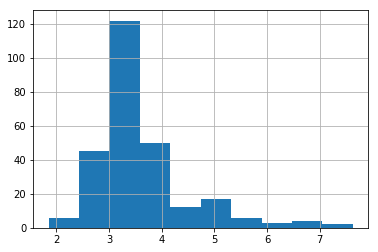

In [35]:
import matplotlib.pyplot as plt 
##we need this line in our notebook to make matplotlib work with Jupyter
%matplotlib inline

point_stats_matrix.Area.hist()

Note: may need to go File -> Trusted Notebook to get plot to display

Now how to add labels to axes?

How about a boxplot of Area values?

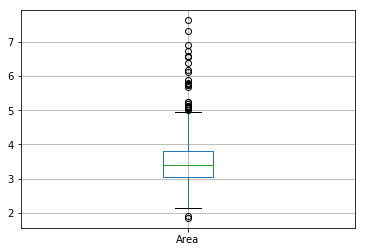

In [36]:
point_stats_matrix.boxplot("Area")

## Filtering

Next we will discuss filtering. not sure what an interesting example would be here, so I'll just stick with area 

In [37]:
large_points=point_stats_matrix[point_stats_matrix.Area >= 5]
large_points.describe()

Name,Area,Diameter X,Diameter Y,Diameter Z,Distance from Origin,Distance to Image Border XY,Distance to Image Border XYZ,Generation,Intensity Center X,Intensity Center Y,...,Intensity Sum Z,Number of Spots per Time Point,Number of Voxels,Position X,Position Y,Position Z,Time,Time Index,Total Number of Spots,Volume
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,...,2.600000e+01,0.0,26.000000,26.000000,26.000000,26.000000,26.0,26.0,0.0,26.000000
mean,5.818515,0.866219,0.866219,2.598658,108.214061,9.936289,7.263877,0.0,21181.038462,7927.461538,...,4.753830e+06,NaN,1300.076923,76.374207,66.383210,21.308130,0.0,1.0,NaN,1.033464
std,0.766723,0.056069,0.056069,0.168207,28.398722,3.507204,1.798431,0.0,3804.630857,2120.057758,...,2.165273e+06,NaN,261.665576,5.347057,42.772832,2.353201,0.0,0.0,NaN,0.207803
min,5.016836,0.805953,0.805953,2.417860,71.384468,4.771820,4.771820,0.0,13608.000000,3609.000000,...,1.297559e+06,NaN,1033.000000,66.553398,1.763613,14.853640,0.0,1.0,NaN,0.822336
25%,5.112515,0.813602,0.813602,2.440807,78.558668,7.341780,5.651921,0.0,18244.000000,6389.250000,...,3.542134e+06,NaN,1063.000000,71.482096,25.535141,19.629226,0.0,1.0,NaN,0.845973
50%,5.742501,0.862274,0.862274,2.586823,111.768314,9.609016,7.060201,0.0,20275.000000,7754.500000,...,4.275706e+06,NaN,1260.000000,77.393776,77.004890,21.835011,0.0,1.0,NaN,1.007062
75%,6.322836,0.904779,0.904779,2.714337,133.223347,12.871048,8.624348,0.0,24356.250000,9363.500000,...,6.314921e+06,NaN,1463.250000,80.683390,104.244123,23.144869,0.0,1.0,NaN,1.163582
max,7.629303,0.993888,0.993888,2.981663,152.067093,15.937996,10.554367,0.0,29199.000000,11852.000000,...,1.052116e+07,NaN,1916.000000,83.771645,124.721184,24.581564,0.0,1.0,NaN,1.542168


In [38]:
**Question**: what is the output of `point_stats_matrix.Area >= 5`? Try in the below cell. 
    
How does this help us select the rows we want out of `point_stats_matrix`?

SyntaxError: invalid syntax (<ipython-input-38-5528f8abd276>, line 1)

In [ ]:
point_stats_matrix.Area >= 5

## Exercises 

## Grouping

Another great DataFrame function is groupby(). It will group a DataFrame by one or more columns, and let you iterate through each group. Not clear what to groupby in this dataset though. might be fun to get a data set that has "treatment" vs "control" for instance to demonstrate these sorts of functions?

## Getting data out

What if you want to save the point_stats_matrix DataFrame as its own csv file?  

In [ ]:
point_stats_matrix.to_csv("data/point_stats-mod.csv")

There is also support for reading and writing Excel files if you need it: http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files

## Area versus Maximum Intensity

## Slice data in X/Y direction and plot

Map point size to area and filter

More cool plot types here: http://matplotlib.org/gallery.html

## Exercise

How many cells meet a certain condition? Can you visualize them?

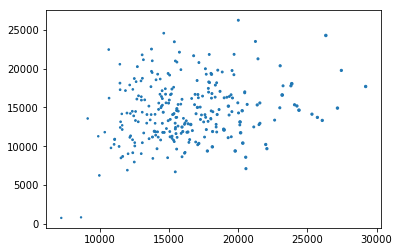

In [45]:
psm = point_stats_matrix
plt.scatter(x=psm["Intensity Max X"], y=psm["Intensity Max Y"], s=psm["Area"])
plt.tight_layout
plt.show()